#####Libraries
***

In [ ]:
!pip install plotly==5.10.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
# !pip install chart_studio
# !pip install plotly
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
# import chart_studio.plotly as py
import plotly.graph_objects as go
# chart_studio.tools.set_credentials_file(username='########',                                              
                                  # api_key='******')

In [ ]:
# from plotly.offline import iplot
# import cufflinks as cf
# cf.go_offline()
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
# init_notebook_mode(connected='true')
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [ ]:
# #read files
# gdrive_path='/content/gdrive/My drive/Folders/Διπλωματική/'
# with open (f'{gdrive_path}Method_6-Random_Forest.xlsx' , 'r') as file:
#   for line in file :
#     print(line)

#####Load data from models(xlsx format)
***

In [ ]:
# # !wget https://docs.google.com/spreadsheets/d/1eblRB3WmyBq47_U_r4HUCudexppzuuSD/edit#gid=997994179
# !wget https://drive.google.com/drive/folders/15LFQpBJs1Jo65i0qE4UrE1LY-K1GAEve
# random_forest = pd.read_excel('Method_6-Random_Forest.xlsx')
# random_forest

In [ ]:
rand_for = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_6-Random_Forest.xlsx',index_col=0)
rand_for1 = rand_for.mean(axis=1)

In [ ]:
log_reg = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_5-Logistic_Regression.xlsx',index_col=0)
log_reg1=log_reg.mean(axis=1)

In [ ]:
rand_for_next_month = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_9-Random_Forest_next_month_predict.xlsx',index_col=0)
rand_for_next_month1=rand_for_next_month.mean(axis=1)

In [ ]:
log_reg_next_month = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_11-Logistic Regression_next_month_prediction.xlsx',index_col=0)
log_reg_next_month1=log_reg_next_month.mean(axis=1)

In [ ]:
grad_boost_next_month = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_10-Gradient_Boosting_next_month_predi.xlsx',index_col=0)
grad_boost_next_month1=grad_boost_next_month.mean(axis=1)

In [ ]:
ses_ranks = pd.read_excel('./drive/MyDrive/Διπλωματική/method1_ses.xlsx',index_col=0)
ses_ranks1=ses_ranks.mean(axis=1)
# ses_ranks

In [ ]:
dummy_method = pd.read_excel('./drive/MyDrive/Διπλωματική/method2_dummy.xlsx',index_col=0)
dummy_method1=dummy_method.mean(axis=1)
# dummy_method

In [ ]:
grad_boost = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_7-Gradient_Boosting_BEST.xlsx',index_col=0)
grad_boost1=grad_boost.mean(axis=1)

In [ ]:
ses_pct = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_3-SES_in_perc_returns.xlsx',index_col=0)
ses_pct1=ses_pct.mean(axis=1)

In [ ]:
naive = pd.read_excel('./drive/MyDrive/Διπλωματική/Method_4-Naive.xlsx',index_col=0)
naive.rename_axis('date',inplace = True)
naive1=naive.mean(axis=1)

#####Visualization
***

AVERAGE RPS/DAY FOR EACH METHOD 

In [ ]:
rand_for1=rand_for1.reset_index()
rand_for1.rename(columns={0:'RPS'},inplace=True)

In [ ]:
fig = px.line(x=rand_for1['date'], y=rand_for1['RPS'],color=px.Constant("Random Forest Next Day"),labels=dict(x="Date", y="RPS", color="RPS evaluation for different methods"))
fig.add_trace(go.Scatter(x=log_reg1.index, y=log_reg1.values,name="Logistic Regression Next Day"))
fig.add_trace(go.Scatter(x=rand_for_next_month1.index, y=rand_for_next_month1.values,name="Random Forest Next Month"))
fig.add_trace(go.Scatter(x=log_reg_next_month1.index, y=log_reg_next_month1.values,name="Logistic Regression Next Month"))
fig.add_trace(go.Scatter(x=grad_boost_next_month1.index, y=grad_boost_next_month1.values,name="Gradient Boosting Next Month"))
fig.add_trace(go.Scatter(x=grad_boost1.index, y=grad_boost1.values,name="Gradient Boosting Next Day"))
fig.add_trace(go.Scatter(x=ses_ranks1.index, y=ses_ranks1.values,name="SES in Ranks"))
fig.add_trace(go.Scatter(x=ses_pct1.index, y=ses_pct1.values,name="SES in Percentage Returns"))
fig.add_trace(go.Scatter(x=dummy_method1.index, y=dummy_method1.values,name="Dummy Method"))
fig.add_trace(go.Scatter(x=naive1.index, y=naive1.values,name="Naive"))

fig.update_layout(
    title='RPS EVALUATION OF METHODS PER DAY')

fig.show()

In [ ]:
# visualize only statistical methods

# ! pip install -U kaleido
# import plotly.io as pio


fig = px.line(x=naive1.index, y=naive1.values,color=px.Constant("Naive"),labels=dict(x="Date", y="RPS", color="Statistical methods"),width=900, height=400)
fig.add_trace(go.Scatter(x=ses_ranks1.index, y=ses_ranks1.values,name="SES on Ranks"))
fig.add_trace(go.Scatter(x=ses_pct1.index, y=ses_pct1.values,name="SES on Percentage Returns"))
fig.add_trace(go.Scatter(x=dummy_method1.index, y=dummy_method1.values,name="Frequency of ranks"))
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="darkgreen")

fig.update_layout(
    title='RPS EVALUATION OF STATISTICAL METHODS PER DAY',
    font=dict(
        size=10,
        
    ))
fig['layout'].update(
   annotations = [
      dict(
         x = "2022-02-02", y = 0.16, # annotation point xref = 'x1',
         yref = 'y1',
         text = 'Benchmark',
         showarrow = True,
         arrowhead = 7,
         ax = 5,
         ay = 30
      )
   ]
   )
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 800,
    'scale': 3 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
# pio.write_image(fig, 'filename.pdf', width=700, height=775)
fig.show(config=config)

In [ ]:
fig = px.line(x=rand_for1['date'], y=rand_for1['RPS'],color=px.Constant("Random Forest Next Day"),labels=dict(x="Date", y="RPS", color="RPS evaluation for different methods"),width=1000, height=400)
fig.add_trace(go.Scatter(x=log_reg1.index, y=log_reg1.values,name="Logistic Regression Next Day"))
fig.add_trace(go.Scatter(x=grad_boost1.index, y=grad_boost1.values,name="Gradient Boosting Next Day"))
fig.add_trace(go.Scatter(x=rand_for_next_month1.index, y=rand_for_next_month1.values,name="Random Forest Next Month"))
fig.add_trace(go.Scatter(x=log_reg_next_month1.index, y=log_reg_next_month1.values,name="Logistic Regression Next Month"))
fig.add_trace(go.Scatter(x=grad_boost_next_month1.index, y=grad_boost_next_month1.values,name="Gradient Boosting Next Month"))
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="black")
fig['layout'].update(
   annotations = [
      dict(
         x = "2022-02-02", y = 0.16, # annotation point xref = 'x1',
         yref = 'y1',
         text = 'Benchmark',
         showarrow = True,
         arrowhead = 7,
         ax = 5,
         ay = 50
      )
   ]
   )

fig.update_layout(
    title='RPS EVALUATION OF METHODS PER DAY')
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image2',
    'height': 400,
    'width': 800,
    'scale': 3 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logistic Regression next day", "Logistic Regression next month"))
fig.add_trace(go.Scatter(x=grad_boost1.index, y=grad_boost1.values,name="Gradient Boosting Next Day"),row=1,col=1)
fig.add_trace(go.Scatter(x=grad_boost_next_month1.index, y=grad_boost_next_month1.values,name="Gradient Boosting Next Month"),row=2,col=1)
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="green",row=1,col=1)
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="green",row=2,col=1)
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='RPS')
fig['layout'].update(
   annotations = [
      dict(
         x = "2022-02-02", y = 0.16,
         xref='x1', 
         yref='y1',
         text = 'Benchmark value',
         showarrow = True,
         arrowhead = 7,
         ax = 10,
         ay = 70
      ),
      dict(
         x = "2022-02-02", y = 0.16,
         xref = 'x2',
         yref = 'y2',
         text = 'Benchmark value',
         showarrow = True,
         arrowhead = 7,
         ax = 10,
         ay = 100
      )
   ]
   )
fig.update_layout(height=650, width=700, title_text="Next day vs next month")
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image2',
    'height': 600,
    'width': 800,
    'scale': 3 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)

In [ ]:
#visualize results by sector - 1.get average for each stock 2.group stocks by sector 3.get average by sector 3.visualize in bar graph
sectors=['Healthcare','Utilities','Consumer','Industrials','Financial Services','Technology','Real Estate','Communication Services','Energy']
stocks_by_sector = [['ABBV','BDX','BMY','CNC','UNH'],['AEP','CNP','PPL'],['AMZN','BF-B','CZR','DG','DPZ','GPC','KR','PG','ROL','ROST'],['ALLE','AVY','CARR','CTAS','URI','VRSK'],['AIZ','AMP','AXP','HIG','JPM','PRU','PYPL','RE','V'],['AMAT','BR','CDW','DXC','FTV',''],['AVB','DRE'],['CHTR','META','GOOG'],['COP','XOM']]
the_dict = dict(zip(sectors, stocks_by_sector))
# final_sectors = pd.DataFrame.from_dict(the_dict)
# final_sectors
the_dict


{'Healthcare': ['ABBV', 'BDX', 'BMY', 'CNC', 'UNH'],
 'Utilities': ['AEP', 'CNP', 'PPL'],
 'Consumer': ['AMZN',
  'BF-B',
  'CZR',
  'DG',
  'DPZ',
  'GPC',
  'KR',
  'PG',
  'ROL',
  'ROST'],
 'Industrials': ['ALLE', 'AVY', 'CARR', 'CTAS', 'URI', 'VRSK'],
 'Financial Services': ['AIZ',
  'AMP',
  'AXP',
  'HIG',
  'JPM',
  'PRU',
  'PYPL',
  'RE',
  'V'],
 'Technology': ['AMAT', 'BR', 'CDW', 'DXC', 'FTV', ''],
 'Real Estate': ['AVB', 'DRE'],
 'Communication Services': ['CHTR', 'META', 'GOOG'],
 'Energy': ['COP', 'XOM']}

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logistic Regression next day", "Logistic Regression next month"))
fig.add_trace(go.Scatter(x=log_reg1.index, y=log_reg1.values,name="Logistic Regression Next Day"),row=1,col=1)
fig.add_trace(go.Scatter(x=log_reg_next_month1.index, y=log_reg_next_month1.values,name="Logistic Regression Next Month"),row=2,col=1)
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="green",row=1,col=1)
fig.add_hline(y=0.16, line_width=2, line_dash="solid", line_color="green",row=2,col=1)
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='RPS')
fig['layout'].update(
   annotations = [
      dict(
         x = "2022-02-02", y = 0.16, # annotation point xref = 'x1',
         xref='x1', 
         yref='y1',
         text = 'Benchmark value',
         showarrow = True,
         arrowhead = 7,
         ax = 10,
         ay = 70
      ),
      dict(
         x = "2022-02-02", y = 0.16, # annotation point xref = 'x1',
         xref = 'x2',
         yref = 'y2',
         text = 'Benchmark value',
         showarrow = True,
         arrowhead = 7,
         ax = 10,
         ay = 100
      )
   ]
   )
fig.update_layout(height=650, width=700, title_text="Next day vs next month")
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image2',
    'height': 600,
    'width': 800,
    'scale': 3 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig.show()

AVERAGE RPS FOR EACH STOCK FOR EVERY METHOD 

In [ ]:
rand_for2 = rand_for.mean()
# rand_for2
log_reg2=log_reg.mean()
rand_for_next_month2=rand_for_next_month.mean()
log_reg_next_month2=log_reg_next_month.mean()
grad_boost_next_month2=grad_boost_next_month.mean()
ses_ranks2=ses_ranks.mean()
ses_ranks2.rename({'FB':'META'},inplace=True)
dummy_method2=dummy_method.mean()
dummy_method2.rename({'FB':'META'},inplace=True)

grad_boost2=grad_boost.mean()
ses_pct2=ses_pct.mean()
naive2=naive.mean()

In [ ]:
data = pd.DataFrame()
for key, val in the_dict.items():
  for i in val:
    # print(type(key))
    s=pd.Series(key)
    data[i]=s
    # print(data[i])


In [ ]:
data.index = ['sectors']
data

,ABBV,BDX,BMY,CNC,UNH,AEP,CNP,PPL,AMZN,BF-B,...,DXC,FTV,,AVB,DRE,CHTR,META,GOOG,COP,XOM
sectors,Healthcare,Healthcare,Healthcare,Healthcare,Healthcare,Utilities,Utilities,Utilities,Consumer,Consumer,...,Technology,Technology,Technology,Real Estate,Real Estate,Communication Services,Communication Services,Communication Services,Energy,Energy


In [ ]:
final_sectors = data.T
final_sectors.reset_index(inplace=True)
final_sectors.columns = ['stock','sectors']
final_sectors

,stock,sectors
0,ABBV,Healthcare
1,BDX,Healthcare
2,BMY,Healthcare
3,CNC,Healthcare
4,UNH,Healthcare
5,AEP,Utilities
6,CNP,Utilities
7,PPL,Utilities
8,AMZN,Consumer
9,BF-B,Consumer


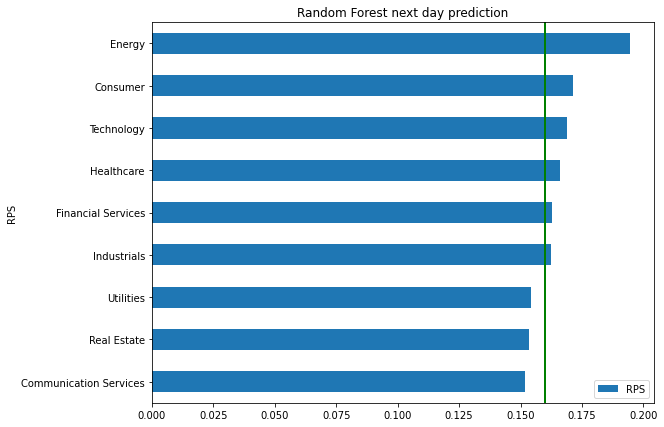

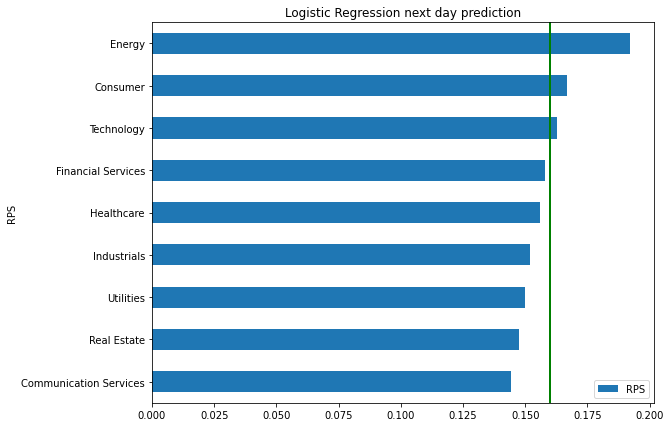

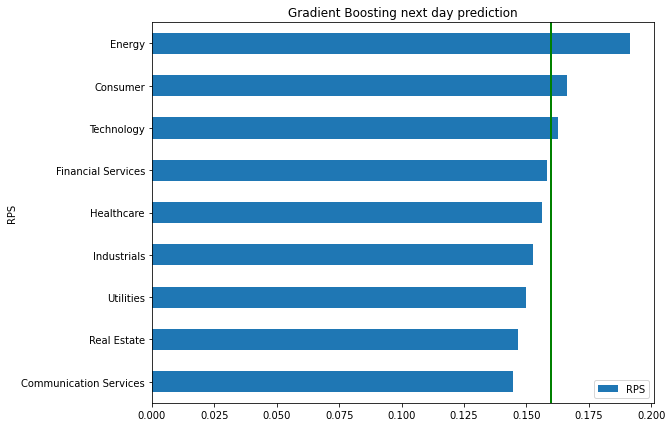

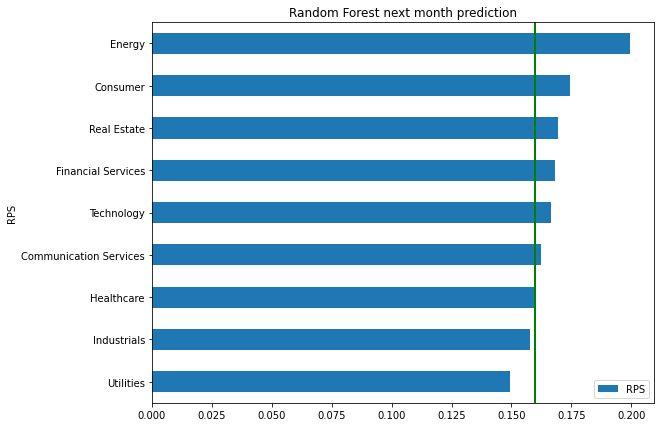

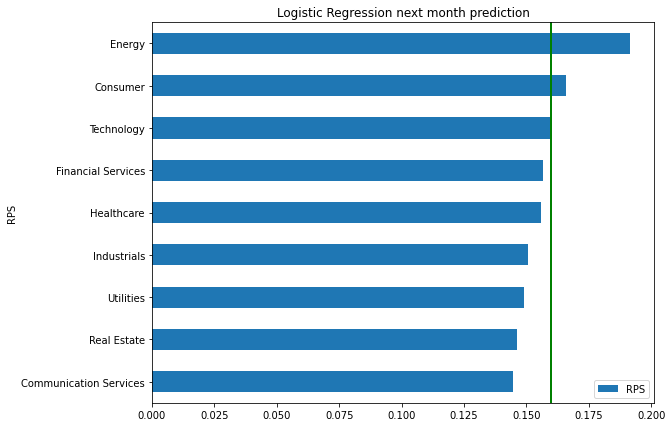

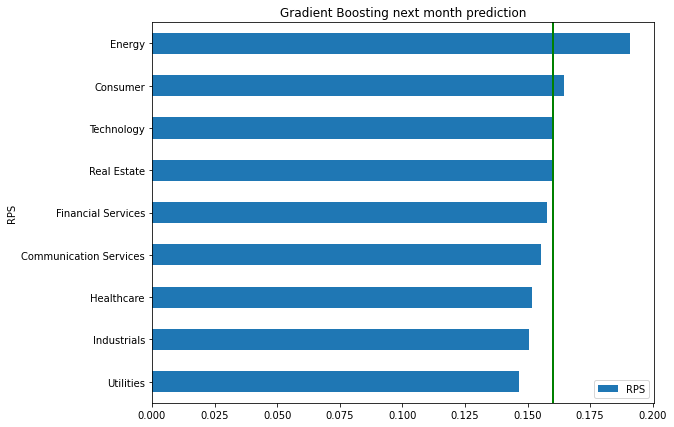

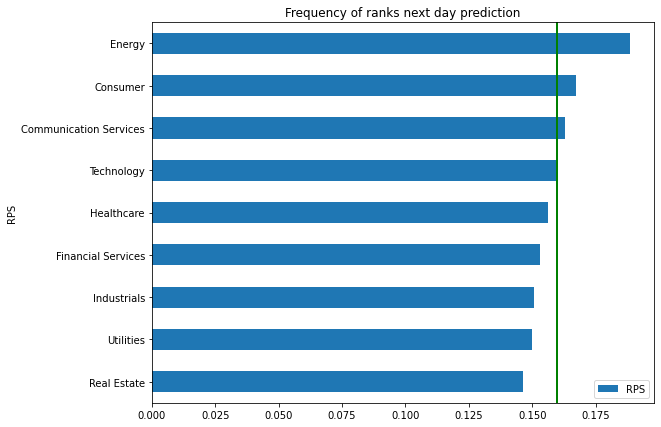

In [ ]:
#for each method concat the average of each stock with this dataframe,groupby and then plot --->function
#example with naive2
def sectors_calc(y,title):

  x=pd.DataFrame(y)
  x.reset_index(inplace=True)
  x.columns = ['stock','RPS']
  x = x.merge(final_sectors,on='stock')
  x
  for_plot=x.groupby(['sectors']).mean()
  for_plot_sorted = for_plot.sort_values('RPS')
  for_plot_sorted.plot(kind='barh',figsize = (9,7))
  plt.ylabel('RPS')
  plt.title(title)
  plt.axvline(x=0.16,linewidth=2, color='g')
  plt.savefig(title + ".jpeg",bbox_inches='tight') 
  # sns.barplot(data=for_plot)
# sectors_calc(naive2)
sectors_calc(rand_for2,'Random Forest next day prediction')
sectors_calc(log_reg2,'Logistic Regression next day prediction')
sectors_calc(grad_boost2,'Gradient Boosting next day prediction')
sectors_calc(rand_for_next_month2,'Random Forest next month prediction')
sectors_calc(log_reg_next_month2,'Logistic Regression next month prediction')
sectors_calc(grad_boost_next_month2,'Gradient Boosting next month prediction')
sectors_calc(dummy_method2,'Frequency of ranks next day prediction')


In [ ]:
fig = px.bar(x=rand_for2.index, y=rand_for2.values,color=px.Constant("Random Forest"),labels=dict(x="STOCKS", y="RPS", color="RPS evaluation for different methods"))
fig.add_trace(go.Bar(x=log_reg2.index, y=log_reg2.values,name="Logistic Regression"))
fig.add_trace(go.Bar(x=rand_for_next_month2.index, y=rand_for_next_month2.values,name="Random Forest Next Month"))
fig.add_trace(go.Bar(x=log_reg_next_month2.index, y=log_reg_next_month2.values,name="Logistic Regression Next Month"))
fig.add_trace(go.Bar(x=grad_boost_next_month2.index, y=grad_boost_next_month2.values,name="Gradient Boosting Next Month"))
fig.add_trace(go.Bar(x=grad_boost2.index, y=grad_boost2.values,name="Gradient Boosting"))
fig.add_trace(go.Bar(x=ses_ranks2.index, y=ses_ranks2.values,name="SES in Ranks"))
fig.add_trace(go.Bar(x=ses_pct2.index, y=ses_pct2.values,name="SES in Percentage Returns"))
fig.add_trace(go.Bar(x=dummy_method2.index, y=dummy_method2.values,name="Dummy Method"))
fig.add_trace(go.Bar(x=naive2.index, y=naive2.values,name="Naive"))

fig.update_layout(
    title='RPS EVALUATION OF METHODS PER STOCK')

fig.show()

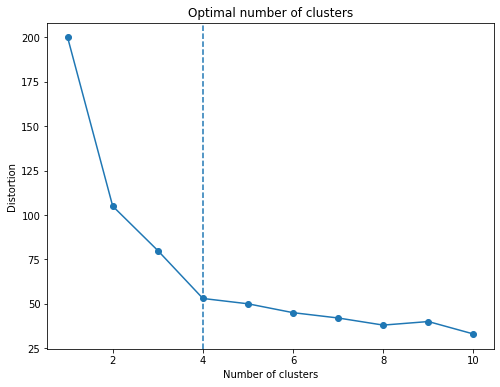

In [ ]:
x = np.arange(1,11)
y = [200,105,80,53,50,45,42,38,40,33]
plt.figure(figsize=(8,6))
plt.plot(x,y,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters')
plt.axvline(x=4,linestyle='dashed')
plt.savefig('k_means.png')
